Merging census tracts with Smart Location Database

In [2]:
import geopandas as gp
import pandas as pd

In [2]:
sld = gp.read_file('SLD_sf/SmartLocationDb.shp')

In [17]:
il = sld[sld['SFIPS'] == '17']

In [19]:
il.columns

Index(['GEOID10', 'TRFIPS', 'CFIPS', 'SFIPS', 'CSA', 'CSA_Name', 'CBSA',
       'CBSA_Name', 'CBSA_EMP', 'CBSA_POP',
       ...
       'D5cri', 'D5ce', 'D5cei', 'D5dr', 'D5dri', 'D5de', 'D5dei',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object', length=117)

In [5]:
tracts = gp.read_file('tracts.shp')

In [6]:
tracts

,GEOID,ZIP_CODES,TRIPS_ORIG,TRIPS_DEST,POPULATION,STORES,geometry
0,17091011700,0,27.0,111.0,3417,0,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17091011800,0,93.0,141.0,2627,0,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17119400951,0,433.0,299.0,4966,0,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17119400952,0,4.0,155.0,3335,0,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17135957500,['62533' '62560'],34.0,45.0,3273,0,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."
...,...,...,...,...,...,...,...
3118,17037000100,['60135'],145.0,245.0,6712,0,"POLYGON ((-88.73488 42.10620, -88.73483 42.106..."
3119,17037001500,0,346.0,156.0,3807,0,"POLYGON ((-88.78378 41.84907, -88.77716 41.860..."
3120,17037000400,['60178'],13.0,499.0,8622,2,"POLYGON ((-88.78353 42.06425, -88.78350 42.064..."
3121,17037000300,['60111' '60150'],110.0,59.0,2680,0,"POLYGON ((-88.94215 42.06505, -88.94211 42.065..."


In [7]:
tracts = tracts.loc[:,('GEOID','ZIP_CODES','TRIPS_ORIG','TRIPS_DEST','POPULATION','STORES','geometry')]

In [8]:
tracts = tracts.rename(columns={"GEOID10": "GEOID"})

In [9]:
tracts

,GEOID,ZIP_CODES,TRIPS_ORIG,TRIPS_DEST,POPULATION,STORES,geometry
0,17091011700,0,27.0,111.0,3417,0,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17091011800,0,93.0,141.0,2627,0,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17119400951,0,433.0,299.0,4966,0,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17119400952,0,4.0,155.0,3335,0,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17135957500,['62533' '62560'],34.0,45.0,3273,0,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."
...,...,...,...,...,...,...,...
3118,17037000100,['60135'],145.0,245.0,6712,0,"POLYGON ((-88.73488 42.10620, -88.73483 42.106..."
3119,17037001500,0,346.0,156.0,3807,0,"POLYGON ((-88.78378 41.84907, -88.77716 41.860..."
3120,17037000400,['60178'],13.0,499.0,8622,2,"POLYGON ((-88.78353 42.06425, -88.78350 42.064..."
3121,17037000300,['60111' '60150'],110.0,59.0,2680,0,"POLYGON ((-88.94215 42.06505, -88.94211 42.065..."


In [20]:
il = il.rename(columns = {'GEOID10' : 'GEOID'})

In [21]:
il.loc[:,'GEOID'] = il.loc[:,'GEOID'].apply(lambda x : x[:-1])

In [61]:
il_ = il.groupby('GEOID', as_index = False) 

In [62]:
il_

In [63]:
il_df = pd.DataFrame(il_.mean())
il_df

,GEOID,CBSA,CBSA_EMP,CBSA_POP,CBSA_WRK,COUNTHU10,TOTPOP10,HH,P_WRKAGE,AUTOOWN0,...,D5cr,D5cri,D5ce,D5cei,D5dr,D5dri,D5de,D5dei,Shape_Leng,Shape_Area
0,17001000100,39500.0,35643.0,77314.0,37229.0,444.400000,925.400000,423.000000,0.794370,21.400000,...,0.018000,0.888000,1.892000,0.852000,-99999.0,-99999.0,-99999.0,-99999.0,0.068365,0.000273
1,17001000201,39500.0,35643.0,77314.0,37229.0,458.500000,993.000000,436.000000,0.777730,41.500000,...,0.015000,0.810000,1.890000,0.850000,-99999.0,-99999.0,-99999.0,-99999.0,0.053465,0.000169
2,17001000202,39500.0,35643.0,77314.0,37229.0,375.333333,999.666667,348.666667,0.801813,10.666667,...,0.020000,0.960000,2.163333,0.973333,-99999.0,-99999.0,-99999.0,-99999.0,0.031330,0.000053
3,17001000400,39500.0,35643.0,77314.0,37229.0,448.250000,1080.500000,383.500000,0.788770,63.250000,...,0.015000,0.710000,1.657500,0.745000,-99999.0,-99999.0,-99999.0,-99999.0,0.054087,0.000123
4,17001000500,39500.0,35643.0,77314.0,37229.0,500.000000,1168.500000,444.500000,0.752065,46.000000,...,0.020000,0.920000,2.060000,0.925000,-99999.0,-99999.0,-99999.0,-99999.0,0.034170,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17203030501,37900.0,171910.0,379186.0,170560.0,693.750000,1892.250000,671.250000,0.737670,7.000000,...,0.002568,0.327500,0.270000,0.452500,-99999.0,-99999.0,-99999.0,-99999.0,0.161381,0.001190
3119,17203030502,37900.0,171910.0,379186.0,170560.0,373.666667,864.000000,346.333333,0.779657,13.666667,...,0.002637,0.336667,0.266667,0.450000,-99999.0,-99999.0,-99999.0,-99999.0,0.207123,0.002054
3120,17203030601,37900.0,171910.0,379186.0,170560.0,479.400000,1281.000000,448.800000,0.750304,18.400000,...,0.002208,0.282000,0.238000,0.400000,-99999.0,-99999.0,-99999.0,-99999.0,0.233517,0.002294
3121,17203030602,37900.0,171910.0,379186.0,170560.0,420.333333,1127.666667,398.333333,0.725630,1.666667,...,0.002180,0.276667,0.216667,0.366667,-99999.0,-99999.0,-99999.0,-99999.0,0.446594,0.006822


In [64]:
il_df = il_df.drop(columns = 'CBSA')

In [65]:
il_df

,GEOID,CBSA_EMP,CBSA_POP,CBSA_WRK,COUNTHU10,TOTPOP10,HH,P_WRKAGE,AUTOOWN0,PCT_AO0,...,D5cr,D5cri,D5ce,D5cei,D5dr,D5dri,D5de,D5dei,Shape_Leng,Shape_Area
0,17001000100,35643.0,77314.0,37229.0,444.400000,925.400000,423.000000,0.794370,21.400000,0.046122,...,0.018000,0.888000,1.892000,0.852000,-99999.0,-99999.0,-99999.0,-99999.0,0.068365,0.000273
1,17001000201,35643.0,77314.0,37229.0,458.500000,993.000000,436.000000,0.777730,41.500000,0.091590,...,0.015000,0.810000,1.890000,0.850000,-99999.0,-99999.0,-99999.0,-99999.0,0.053465,0.000169
2,17001000202,35643.0,77314.0,37229.0,375.333333,999.666667,348.666667,0.801813,10.666667,0.024130,...,0.020000,0.960000,2.163333,0.973333,-99999.0,-99999.0,-99999.0,-99999.0,0.031330,0.000053
3,17001000400,35643.0,77314.0,37229.0,448.250000,1080.500000,383.500000,0.788770,63.250000,0.191403,...,0.015000,0.710000,1.657500,0.745000,-99999.0,-99999.0,-99999.0,-99999.0,0.054087,0.000123
4,17001000500,35643.0,77314.0,37229.0,500.000000,1168.500000,444.500000,0.752065,46.000000,0.098905,...,0.020000,0.920000,2.060000,0.925000,-99999.0,-99999.0,-99999.0,-99999.0,0.034170,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17203030501,171910.0,379186.0,170560.0,693.750000,1892.250000,671.250000,0.737670,7.000000,0.008803,...,0.002568,0.327500,0.270000,0.452500,-99999.0,-99999.0,-99999.0,-99999.0,0.161381,0.001190
3119,17203030502,171910.0,379186.0,170560.0,373.666667,864.000000,346.333333,0.779657,13.666667,0.042157,...,0.002637,0.336667,0.266667,0.450000,-99999.0,-99999.0,-99999.0,-99999.0,0.207123,0.002054
3120,17203030601,171910.0,379186.0,170560.0,479.400000,1281.000000,448.800000,0.750304,18.400000,0.031608,...,0.002208,0.282000,0.238000,0.400000,-99999.0,-99999.0,-99999.0,-99999.0,0.233517,0.002294
3121,17203030602,171910.0,379186.0,170560.0,420.333333,1127.666667,398.333333,0.725630,1.666667,0.004770,...,0.002180,0.276667,0.216667,0.366667,-99999.0,-99999.0,-99999.0,-99999.0,0.446594,0.006822


In [117]:
tracts = tracts.merge(il_df, on = 'GEOID')

In [154]:
tracts.to_file('tracts.shp')

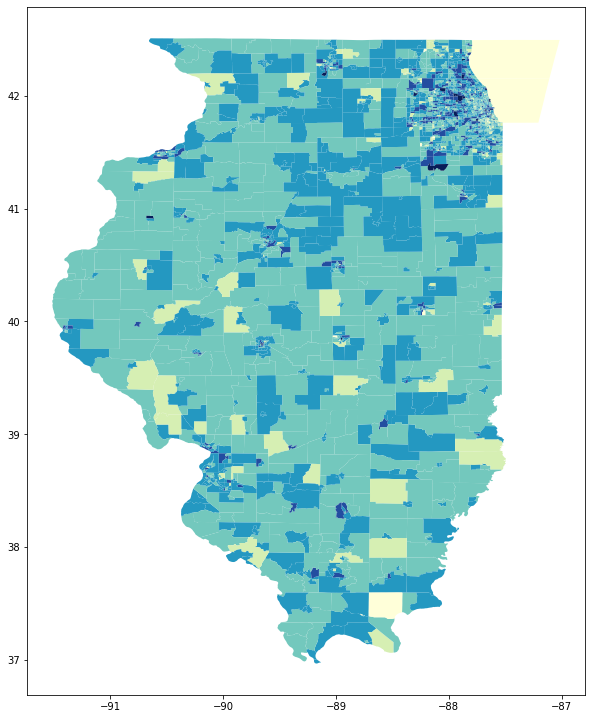

In [153]:
tracts.plot(column='D2A_JPHH', cmap='YlGnBu', scheme = 'percentiles', figsize = (10,30));

In [120]:
tracts.columns.values

array(['GEOID', 'ZIP_CODES', 'TRIPS_ORIG', 'TRIPS_DEST', 'POPULATION',
       'STORES', 'geometry', 'CBSA_EMP', 'CBSA_POP', 'CBSA_WRK',
       'COUNTHU10', 'TOTPOP10', 'HH', 'P_WRKAGE', 'AUTOOWN0', 'PCT_AO0',
       'AUTOOWN1', 'PCT_AO1', 'AUTOOWN2P', 'PCT_AO2P', 'WORKERS',
       'R_LOWWAGEW', 'R_MEDWAGEW', 'R_HIWAGEWK', 'R_PCTLOWWA', 'EMPTOT',
       'E5_RET10', 'E5_OFF10', 'E5_IND10', 'E5_SVC10', 'E5_ENT10',
       'E8_RET10', 'E8_OFF10', 'E8_IND10', 'E8_SVC10', 'E8_ENT10',
       'E8_ED10', 'E8_HLTH10', 'E8_PUB10', 'E_FEDT10', 'E_FEDRET10',
       'E_FEDOFF10', 'E_FEDIND10', 'E_FEDSVC10', 'E_FEDENT10',
       'E_LOWWAGEW', 'E_MEDWAGEW', 'E_HIWAGEWK', 'E_PCTLOWWA', 'AC_TOT',
       'AC_WATER', 'AC_LAND', 'AC_UNPR', 'D1A', 'D1B', 'D1C',
       'D1C5_Ret10', 'D1C5_Off10', 'D1C5_Ind10', 'D1C5_Svc10',
       'D1C5_Ent10', 'D1C8_Ret10', 'D1C8_Off10', 'D1C8_Ind10',
       'D1C8_Svc10', 'D1C8_Ent10', 'D1C8_Ed10', 'D1C8_Hlth1',
       'D1C8_Pub10', 'D1D', 'D1_flag', 'D2A_JPHH', 'D2B_E5MIX',

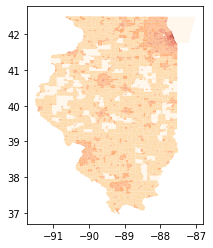

In [126]:
il.plot(column='D1A', cmap='OrRd', scheme='percentiles');

In [125]:
il.D1A

59463    0.650412
59464    0.203111
59465    0.063167
59466    0.344723
59467    0.022427
           ...   
69149    2.604184
69150    1.797404
69151    0.596424
69152    3.386534
69153    4.633382
Name: D1A, Length: 9691, dtype: float64

In [155]:
data = gp.read_file('tracts.shp')

In [156]:
data

,GEOID,ZIP_CODES,TRIPS_ORIG,TRIPS_DEST,POPULATION,STORES,CBSA_EMP,CBSA_POP,CBSA_WRK,COUNTHU10,...,D5cri,D5ce,D5cei,D5dr,D5dri,D5de,D5dei,Shape_Leng,Shape_Area,geometry
0,17091011700,0,27.0,111.0,3417,0,43299.0,113449.0,46799.0,378.250000,...,0.760000,1.335000,0.592500,-99999.0,-99999.0,-99999.0,-99999.0,0.035996,0.000066,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17091011800,0,93.0,141.0,2627,0,43299.0,113449.0,46799.0,589.000000,...,0.800000,1.415000,0.630000,-99999.0,-99999.0,-99999.0,-99999.0,0.048832,0.000099,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17119400951,0,433.0,299.0,4966,0,1261547.0,2812896.0,1237055.0,749.333333,...,0.346667,0.040000,0.496667,0.0,0.0,0.0,0.0,0.067829,0.000184,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17119400952,0,4.0,155.0,3335,0,1261547.0,2812896.0,1237055.0,712.000000,...,0.365000,0.045000,0.525000,0.0,0.0,0.0,0.0,0.088523,0.000314,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17135957500,['62533' '62560'],34.0,45.0,3273,0,0.0,0.0,0.0,372.000000,...,0.157500,-99999.000000,0.000000,-99999.0,-99999.0,-99999.0,-99999.0,0.482649,0.011777,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17037000100,['60135'],145.0,245.0,6712,0,4161510.0,9461105.0,4066635.0,852.666667,...,0.033333,0.002634,0.080000,0.0,0.0,0.0,0.0,0.261038,0.003633,"POLYGON ((-88.73488 42.10620, -88.73483 42.106..."
3119,17037001500,0,346.0,156.0,3807,0,4161510.0,9461105.0,4066635.0,551.666667,...,0.036667,0.002759,0.083333,0.0,0.0,0.0,0.0,0.132508,0.001399,"POLYGON ((-88.78378 41.84907, -88.77716 41.860..."
3120,17037000400,['60178'],13.0,499.0,8622,2,4161510.0,9461105.0,4066635.0,1652.500000,...,0.030000,0.002371,0.070000,0.0,0.0,0.0,0.0,0.384790,0.007499,"POLYGON ((-88.78353 42.06425, -88.78350 42.064..."
3121,17037000300,['60111' '60150'],110.0,59.0,2680,0,4161510.0,9461105.0,4066635.0,552.000000,...,0.020000,0.001759,0.050000,0.0,0.0,0.0,0.0,0.528644,0.015534,"POLYGON ((-88.94215 42.06505, -88.94211 42.065..."


In [3]:
data = gp.read_file('tl_2019_17_tract.shp')

In [5]:
data.to_csv('raw_tracts.csv')